# Introduction

Within this project, we will be predicting a car's market price using its attributes via the use of k-nearest neighbors algorithm.

In [2]:
import pandas as pd 
cars = pd.read_csv('imports-85.data', header=None) 
# we would like to use header=None, otherwise pandas would treat the first 
# row of data as the header

In [4]:
cars.head()

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


We will now replace the column headers based on data from the source: https://archive.ics.uci.edu/ml/datasets/automobile. 

In [283]:
col_names = ['symboling', 
             'normalized_losses',
             'make', 
             'fuel_type', 
             'aspiration', 
             'num_of_doors', 
             'body_style', 
             'drive_wheels', 
             'engine_location', 
             'wheel_base', 
             'length', 
             'width', 
            'height', 
            'curb_weight', 
            'engine_type',
            'num_of_cylinders', 
            'engine_size',
            'fuel_system', 
            'bore',
            'stroke',
            'compression_ratio',
            'horsepower', 
            'peak_rpm', 
            'city_mpg', 
            'highway_mpg', 
            'price']
original_names = range(0,26)
for i,j in zip(original_names, col_names):
    cars.rename(columns={i:j}, inplace=True)

In [284]:
cars.head()

,symboling,normalized_losses,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


We can see that the headers are now successfully renamed and in line with the source of data given. Let us now deterine which columns are numeric and can be used as features and then select the target column.

Upon inspection, we can see that columns 10-14,17,19-25 are all contenders to be used as features while column 26 (price) is the target. 

# Data Cleaning

The first step is to replace '?' string values in the 'symboling' column to np.nan.

In [285]:
import numpy as np
cars = cars.replace('?', np.nan)

In [286]:
cars.head()

,symboling,normalized_losses,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [287]:
cars.dtypes

symboling              int64
normalized_losses     object
make                  object
fuel_type             object
aspiration            object
num_of_doors          object
body_style            object
drive_wheels          object
engine_location       object
wheel_base           float64
length               float64
width                float64
height               float64
curb_weight            int64
engine_type           object
num_of_cylinders      object
engine_size            int64
fuel_system           object
bore                  object
stroke                object
compression_ratio    float64
horsepower            object
peak_rpm              object
city_mpg               int64
highway_mpg            int64
price                 object
dtype: object

Columns that should be converted into int/float type: normalized_losses, bore, stroke, horsepower, peak_rpm, price.

Let us first fix num_of_cylinders and num_of doors by converting number words into integers. We know for num_of_cylinders from the dataset that all possible values are "eight, five, four, six, three, twelve, two" and for num_of_doors is "four, two.". 

In [288]:
cars.dtypes

symboling              int64
normalized_losses     object
make                  object
fuel_type             object
aspiration            object
num_of_doors          object
body_style            object
drive_wheels          object
engine_location       object
wheel_base           float64
length               float64
width                float64
height               float64
curb_weight            int64
engine_type           object
num_of_cylinders      object
engine_size            int64
fuel_system           object
bore                  object
stroke                object
compression_ratio    float64
horsepower            object
peak_rpm              object
city_mpg               int64
highway_mpg            int64
price                 object
dtype: object

In [289]:
cols_to_be_converted = ['normalized_losses', 
                        'bore', 
                        'stroke', 
                        'horsepower', 
                        'peak_rpm', 
                        'price']
cars[cols_to_be_converted] = cars[cols_to_be_converted].astype(float)

Let us now analyze the normalized_losses column in terms for its null values.

In [290]:
a = cars['normalized_losses'].isnull().sum()
b = cars['normalized_losses'].notnull().sum()
c = a/b
print(a)
print(b)
print(c)

41
164
0.25


We can see there are 41 null and 164 values, meaning 25% of values are null values.

Let us discover the amount of null values in the rest of the columns in order to determine what to do with the null values.

In [291]:
cars.isnull().sum()

symboling             0
normalized_losses    41
make                  0
fuel_type             0
aspiration            0
num_of_doors          2
body_style            0
drive_wheels          0
engine_location       0
wheel_base            0
length                0
width                 0
height                0
curb_weight           0
engine_type           0
num_of_cylinders      0
engine_size           0
fuel_system           0
bore                  4
stroke                4
compression_ratio     0
horsepower            2
peak_rpm              2
city_mpg              0
highway_mpg           0
price                 4
dtype: int64

Let us eliminate the rows that have a null value for price as the price column is what we are predicting for (we cannot predict a null value). We will fill all other null values with the mean for that respective column.

In [292]:
cars = cars[cars['price'].notnull()]

In [293]:
for col in cars.columns:
    if cars[col].dtype=='float64' or cars[col].dtype=='int':
        cars[col] = cars[col].fillna(np.mean(cars[col]))

In [294]:
cars.isnull().sum()

symboling            0
normalized_losses    0
make                 0
fuel_type            0
aspiration           0
num_of_doors         2
body_style           0
drive_wheels         0
engine_location      0
wheel_base           0
length               0
width                0
height               0
curb_weight          0
engine_type          0
num_of_cylinders     0
engine_size          0
fuel_system          0
bore                 0
stroke               0
compression_ratio    0
horsepower           0
peak_rpm             0
city_mpg             0
highway_mpg          0
price                0
dtype: int64

We can now confirm that there are no longer missing values in any of the columns. We will now normalize all the numeric ones to be in a range from 0 to 1 (normal distribution). We will be using min-max normalization instead of mean normalization because min-max normalization (mean norm doesn't work in this scenario). 

we can either standarize the target output or not, this won't change the distribution and seeing what feature column produce the lowest RMSE. we will be solely standarizing feature columns in this project. 

In [295]:
from sklearn.preprocessing import MinMaxScaler
numerical_columns = []
for col in cars.columns:
    if cars[col].dtype=='float64' or cars[col].dtype=='int64':
        numerical_columns.append(col)
numerical_cars = cars[numerical_columns]

# normalizing the values via scikit module
val = numerical_cars.values
min_max = MinMaxScaler()
val_scaled = min_max.fit_transform(val)
numerical_cars_copy = numerical_cars.copy()
numerical_cars_copy.loc[:,:] = val_scaled
standarized_cars = numerical_cars_copy
standarized_cars['price'] = numerical_cars['price']

In [296]:
numerical_cars.head()

,symboling,normalized_losses,wheel_base,length,width,height,curb_weight,engine_size,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,122.0,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,122.0,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,122.0,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,164.0,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,164.0,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0


# Univariate Model

Let us now apply a univariate K-Nearest Neighbors model before moving onto multivariate complex models, structuring the workflow and helping us understand the features better.

We will first implement a train/test validation instead of a k-cross fold validation.

In [297]:
sc = standarized_cars
sc.notnull().sum()

symboling            201
normalized_losses    201
wheel_base           201
length               201
width                201
height               201
curb_weight          201
engine_size          201
bore                 201
stroke               201
compression_ratio    201
horsepower           201
peak_rpm             201
city_mpg             201
highway_mpg          201
price                201
dtype: int64

In [298]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from sklearn.utils import shuffle
# let us create a univariate k neighbors algorithm function testing for different features
def knn_train_test(train_col, target_col, df):
    np.random.seed(1)
    shuffle_index = np.random.permutation(df.index)
    df = df.reindex(shuffle_index)
    train = df.loc[df.index[0:100]] #75% of the data will be trained
    test = df.loc[df.index[100:]] #25% of the data will be tested/predicted
    # the following shows how the solution key shuffles via numpy's random permutation
    #   np.random.seed(1)  
    # Randomize order of rows in data frame.
    #shuffled_index = np.random.permutation(df.index)
    #rand_df = df.reindex(shuffled_index)
    knn = KNeighborsRegressor() 
    knn.fit(train[[train_col]], train[target_col])
    predictions = knn.predict(test[[train_col]])
    mse = mean_squared_error(predictions, test[target_col])
    rmse = mse**(1/2)
    rmse_avg = np.mean(rmse)
    return rmse_avg 

We will the test the above function for all the numerical columns of the dataset.

In [299]:
numerical_columns = sc.columns[:-1]
rmses_list = {}
for col in numerical_columns:
    rmses_list[col]=knn_train_test(col, 'price', sc)

In [300]:
rmses_series = pd.Series(rmses_list)
sorted_rmses=rmses_series.sort_values()
print(sorted_rmses)

engine_size          3280.186491
horsepower           4006.071731
curb_weight          4399.140579
width                4619.772092
city_mpg             5081.200814
highway_mpg          5160.987106
length               5423.674947
wheel_base           5461.551400
compression_ratio    6276.684871
bore                 6779.673768
peak_rpm             7424.157342
normalized_losses    7658.733984
height               7659.363093
symboling            8004.711031
stroke               8267.173985
dtype: float64


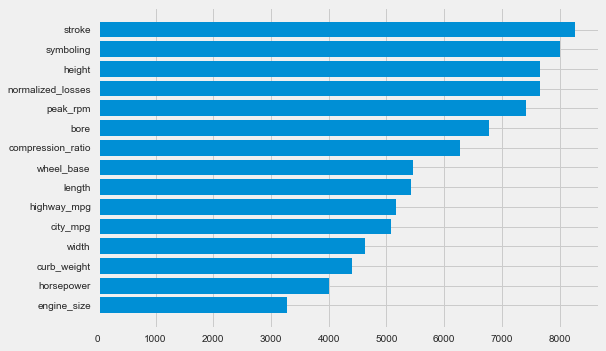

In [301]:
plt.barh(sorted_rmses.index, sorted_rmses)
plt.show()

We can see that basing it on solely the engine size will yield the lowest RMSE error consistently.

Let us now modify the knn_train_test() function to accept a paramter for the "k" value. We will vary the k value to values 1,3,5,7,9 for each feature column. We will then visualize these results we a scatter plot.

In [303]:
 def knn_train_test(train_col, target_col, df,k):
    np.random.seed(1)
    shuffle_index = np.random.permutation(df.index)
    df = df.reindex(shuffle_index)
    train = df.loc[df.index[0:100]] #75% of the data will be trained
    test = df.loc[df.index[100:]] #25% of the data will be tested/predicted
    # the following shows how the solution key shuffles via numpy's random permutation
    #   np.random.seed(1)  
    # Randomize order of rows in data frame.
    #shuffled_index = np.random.permutation(df.index)
    #rand_df = df.reindex(shuffled_index)
    knn = KNeighborsRegressor(n_neighbors=k) 
    knn.fit(train[[train_col]], train[target_col])
    predictions = knn.predict(test[[train_col]])
    mse = mean_squared_error(predictions, test[target_col])
    rmse = mse**(1/2)
    rmse_avg = np.mean(rmse)
    return rmse_avg 

In [308]:
full_categ = {}
k_values = [1,3,5,7,9]
numerical_columns = sc.columns[:-1]
for col in numerical_columns:
    k_categ = {}
    for k in k_values: 
        k_categ[k]=knn_train_test(col, 'price', sc, k)
    full_categ[col]=k_categ

In [309]:
univariate = pd.DataFrame(full_categ)

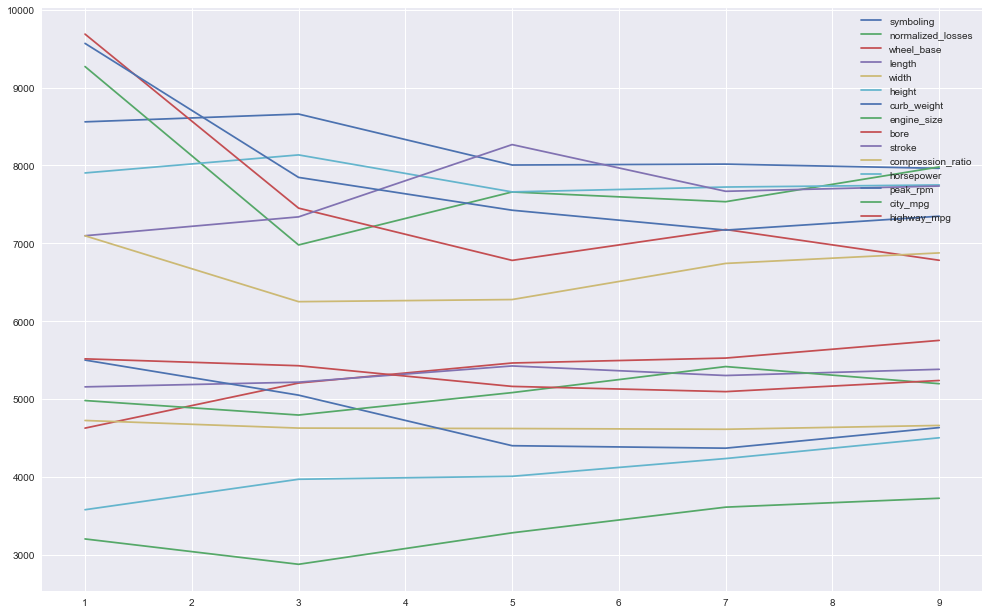

In [313]:
import matplotlib.pyplot as plt
from matplotlib import style
fig, ax = plt.subplots(1, 1, figsize=(15,10))
for col in univariate.columns:
    ax.plot(univariate[col])
ax.legend(univariate.columns)
plt.style.use('seaborn')
plt.show()

# Multivariate Model

We will now modify the function use the best 2,3,4,5 features from the previous step to test a multivariate k-nearest neighbors with the default k value. 

In [322]:
 def knn_train_test(train_col, target_col, df,k):
    np.random.seed(1)
    shuffle_index = np.random.permutation(df.index)
    df = df.reindex(shuffle_index)
    train = df.loc[df.index[0:100]] #75% of the data will be trained
    test = df.loc[df.index[100:]] #25% of the data will be tested/predicted
    # the following shows how the solution key shuffles via numpy's random permutation
    #   np.random.seed(1)  
    # Randomize order of rows in data frame.
    #shuffled_index = np.random.permutation(df.index)
    #rand_df = df.reindex(shuffled_index)
    knn = KNeighborsRegressor(n_neighbors=k) 
    knn.fit(train.loc[:,train_col], train.loc[:,target_col])
    predictions = knn.predict(test.loc[:,train_col])
    mse = mean_squared_error(predictions, test.loc[:,target_col])
    rmse = mse**(1/2)
    rmse_avg = np.mean(rmse)
    return rmse_avg 

2,3,4,5 of the best feature columns from previous section:

In [323]:
best_5 = []
best_rmses = {}
range_index = range(2,6)
for a in sorted_rmses.index[0:5]:
    best_5.append(a)
for i in range_index: 
    best_rmses["{} best features".format(i)] = knn_train_test(best_5[0:i], 'price', sc, 5)
best_rmses

{'2 best features': 2955.187607386625,
 '3 best features': 3424.9595705353922,
 '4 best features': 3487.563298747749,
 '5 best features': 3360.832156381264}

# Hyperparameter Tuning

We can now optimize the top 3 models that performed the best from the previous step. These models are conveniently that used 2,3,4 features. We will vary the hyperparamter value from 1 to 25 and analyze the optimal k value for the lowest RMSE value.

In [324]:
import numpy as np
def knn_train_test(train_col, target_col, df,k):
    np.random.seed(1)
    shuffle_index = np.random.permutation(df.index)
    df = df.reindex(shuffle_index)
    train = df.loc[df.index[0:100]] #75% of the data will be trained
    test = df.loc[df.index[100:]] #25% of the data will be tested/predicted
    # the following shows how the solution key shuffles via numpy's random permutation
    #   np.random.seed(1)  
    # Randomize order of rows in data frame.
    #shuffled_index = np.random.permutation(df.index)
    #rand_df = df.reindex(shuffled_index)
    knn = KNeighborsRegressor(n_neighbors=k) 
    knn.fit(train.loc[:,train_col], train.loc[:,target_col])
    predictions = knn.predict(test.loc[:,train_col])
    mse = mean_squared_error(predictions, test.loc[:,target_col])
    rmse = mse**(1/2)
    rmse_avg = np.mean(rmse)
    return rmse_avg 
    

In [325]:
categ = {}
for i in range(2,5):
    k_categ = {}
    for j in range(1,26):
        k_categ[j] = knn_train_test(best_5[0:i], 'price', sc, j)
    categ['{} best features'.format(i)]=k_categ

In [326]:
model = pd.DataFrame(categ)

In [327]:
model.head()

,2 best features,3 best features,4 best features
1,2450.273876,3149.531127,2971.527405
2,2661.998713,3006.852759,3130.054253
3,2795.246519,3016.706975,3116.066767
4,2864.036330,3144.002240,3243.786203
5,2955.187607,3424.959571,3487.563299


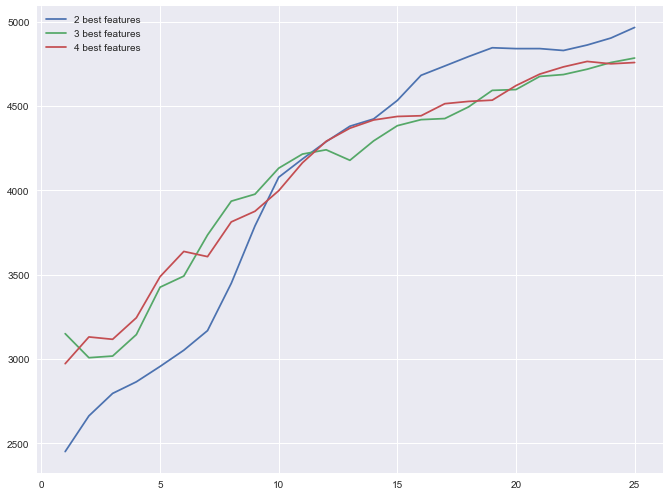

In [331]:
fig, ax = plt.subplots(1,1,figsize=(10,8))
ax.plot(model)
ax.legend(['2 best features', '3 best features', '4 best features'])
plt.show()

We can see a trend where as we increase the k value, the RMSE error value generally increases, following a linear relationship between the two variables. Therefore, it is ideal to keep the k value at a minimum for the lowest error possible.

# K-Fold Cross Validation

We would like to ensure that every observation from the orgiinal dataset has the chance of appearing in training and test set, for possibility to minimize RMSE error, therefore we will implement K-Fold Cross Validation via Scikit-learn.

In [338]:
from sklearn.model_selection import cross_val_score, KFold
def knn_train_test(train_col, target_col, df,k):
    knn = KNeighborsRegressor()
    kf = KFold(n_splits=k, shuffle=True, random_state=1)
    mses = cross_val_score(knn, df.loc[:,train_col], df[target_col], 
                          scoring='neg_mean_squared_error', cv=kf)
    abs_mses = abs(mses)
    rmses = abs_mses**(1/2)
    rmses_avg = np.mean(rmses)
    return rmses_avg 

2896.998348517261

Above is the modified function to use KFold instead, which is more lucrative and shorter. Note that the argument of train_col needs to be inputted as a list no matter if it is one or three elements. 

Let us test the use of the function by varying the number of splits using the two best features, engine size and horsepower.

In [358]:
modelling_splits = {}
for i in range(2,20):
    modelling_splits['{} number of splits'.format(i)] = knn_train_test(
        ['engine_size', 'horsepower'], 'price', sc, i)
model_splits = pd.Series(modelling_splits)
model_splits.sort_values().head()

17 number of splits    2732.362659
18 number of splits    2739.451589
15 number of splits    2830.104816
12 number of splits    2831.216615
19 number of splits    2837.115473
dtype: float64

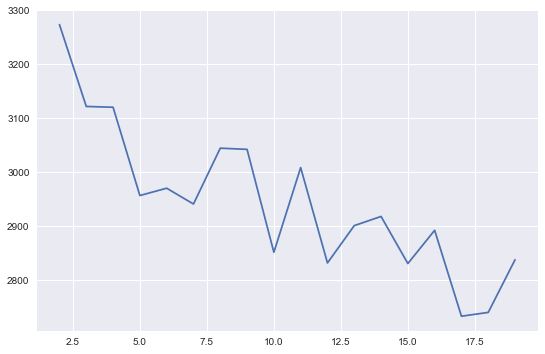

In [361]:
plt.plot(range(2,20), model_splits) 
plt.show()

We can see that as we increase the number of splits, the error gradually decreases with very little differences between the upper limits of our range (17,18,19). We can test for the case of leave one out validation in hopes to minimise the error:

In [362]:
knn_train_test(['engine_size', 'horsepower'], 'price', sc, len(sc))

1945.2746268656717

As expected, we decreased the error even further, achieving a global minimum in terms of RMSE.